### Importing Libraries

In [1]:
import pandas as pd #for dataframe
import numpy as np #for numerical calculations
import seaborn as sns #for visualisation purposes
import matplotlib.pyplot as plt #is a 2D plotting library for Python.
import warnings #allows you to control the behavior of warnings in your code.
from datetime import datetime #used for manipulating dates and times.

################### Sklearn ####################################
from sklearn.preprocessing import MinMaxScaler #or scaling numerical features to a specified range, typically between 0 and 1.
from sklearn.model_selection import train_test_split, GridSearchCV #is used to split datasets into training and testing sets, 
from sklearn.ensemble import RandomForestClassifier #Random Forest is an ensemble learning method for classification.
from sklearn import metrics #includes functions for evaluating the performance of machine learning models
from sklearn.linear_model import LogisticRegression #which is used for logistic regression.
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier #which is used for decision tree-based classification.
from sklearn.neighbors import KNeighborsClassifier #which is used for k-nearest neighbors classification.

### Library configurations

In [2]:
pd.options.mode.copy_on_write = True # Allow re-write on variable
sns.set_style('darkgrid') # Seaborn style
warnings.filterwarnings('ignore') # Ignore warnings
pd.set_option('display.max_columns', None) # Setting this option will print all collumns of a dataframe
pd.set_option('display.max_colwidth', None) # Setting this option will print all of the data in a feature

### Collecting Data

- At first, import dataset in csv format by pandas library and read_csv method.

In [3]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Data Informations
- We drop id columns, because its a unique identifier number.

In [4]:
# Drop column = 'id'
#Here we are as it doesnot contribute meaningful information to the analysis.
#It is redundant and can  be removed from the dataset.
#Reduces the dimentionality of the dataset.
data.drop(columns='id', inplace=True)

In [5]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
#describe():method computes summary statistics for numerical columns in the DataFrame.
#include='all' parameter ensures that both numerical and categorical columns are included in the summary statistics.
#round(..., 2) is used to round the numerical values to two decimal places for better readability.
round(data.describe(include='all'), 2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.00,5110.0,5110.00,5110,5110,5110,5110.00,4909.00,5110,5110.00
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.23,0.1,0.05,NaN,NaN,NaN,106.15,28.89,NaN,0.05
std,NaN,22.61,0.3,0.23,NaN,NaN,NaN,45.28,7.85,NaN,0.22
min,NaN,0.08,0.0,0.00,NaN,NaN,NaN,55.12,10.30,NaN,0.00
25%,NaN,25.00,0.0,0.00,NaN,NaN,NaN,77.24,23.50,NaN,0.00
50%,NaN,45.00,0.0,0.00,NaN,NaN,NaN,91.88,28.10,NaN,0.00
75%,NaN,61.00,0.0,0.00,NaN,NaN,NaN,114.09,33.10,NaN,0.00


- We have 5110 samples , with no null values

###  Handling Missing Values

In [8]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
#calculating the percentage of missing values for each column in the DataFrame and prints the result.
#useful for understanding the proportion of missing values in each column.
print((data.isna().sum()/len(data))*100)

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


- There is 201 samples with no values in bmi column , its about 4% of data. For better result we drop them.

In [10]:
### Missing values in BMI columns is about 4% , we drop them.
data.dropna(how='any', inplace=True)

#how='any' specifies that a row should be dropped if it contains at least one missing value.

### Visualization and Plots

In [11]:
#Separating the independent variable and target variable
#This is often done to prepare the data for training a machine learning model
# The idea is that you want to use the features to train the model to predict the target variable.
cols = data.columns[:-1]
cols

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [12]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [13]:
#contain the names of columns categorized as numerical and categorical, respectively.
numeric_columns = ['age', 'bmi', 'avg_glucose_level']
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

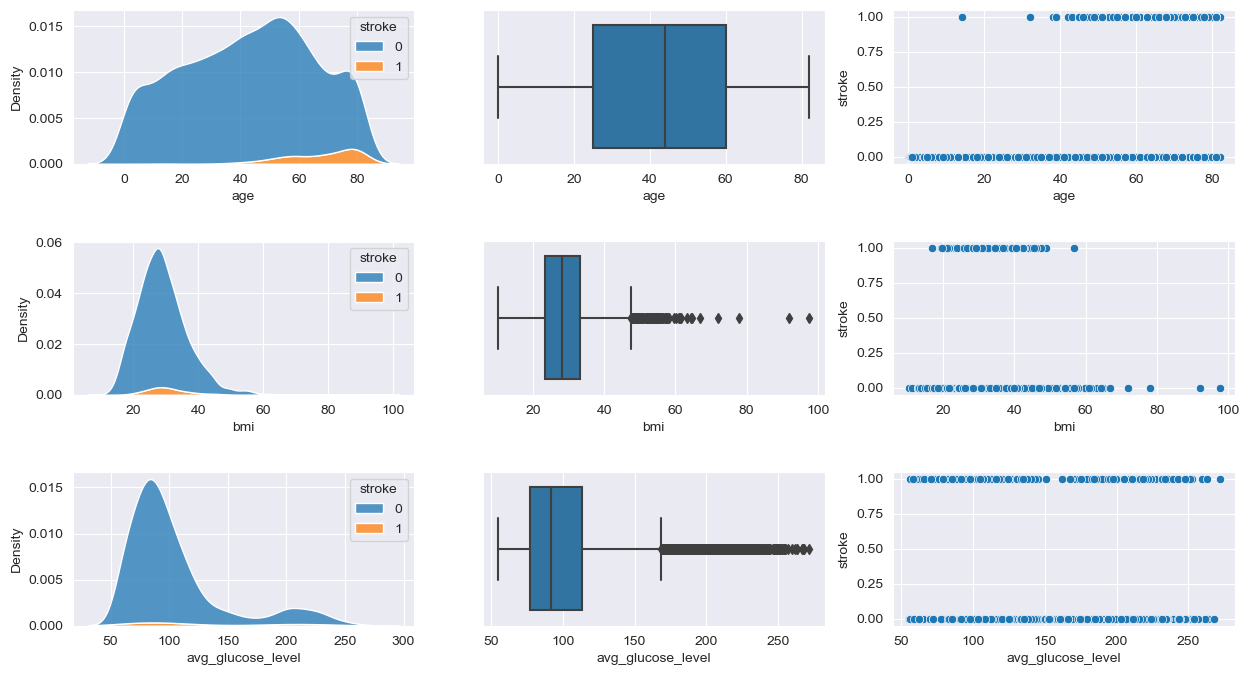

In [14]:
#This code different types of plots (KDE plot, boxplot, and scatter plot) for numerical columns in a dataset.

i = 0
fig, ax = plt.subplots(3, 3, figsize=(15, 8)) #Creating a 3x3 grid
plt.subplots_adjust(hspace = 0.5) #Adjusting the vertical space between subplots for better readability.
for num_col in numeric_columns :
    sns.kdeplot(x=num_col, hue='stroke', data=data, multiple='stack', ax=ax[i,0]) #Creating a Kernel Density Estimate (KDE) plot
    sns.boxplot(x=num_col, data=data, ax=ax[i, 1]) #Creating a boxplot
    sns.scatterplot(x=num_col, y='stroke', data=data, ax=ax[i, 2]) #Creating a scatter plot
    i+=1 #Incrementing the counter variable i to move to the next row of subplots.
plt.show()

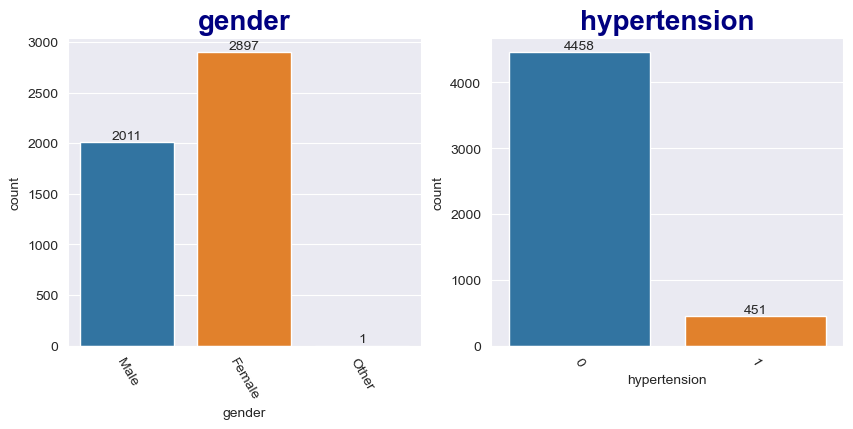

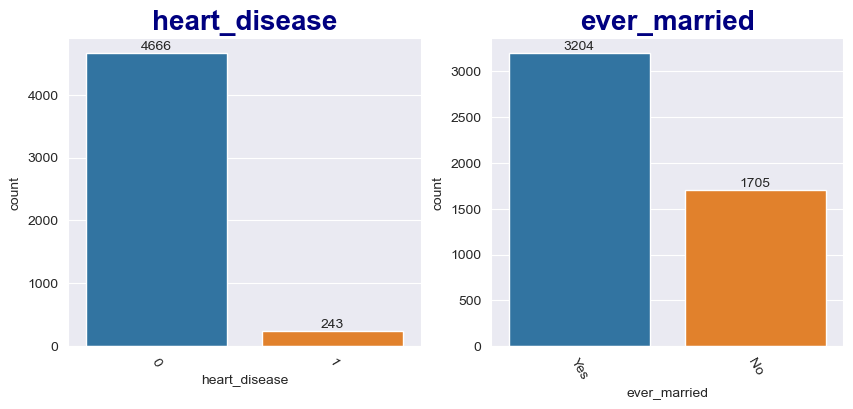

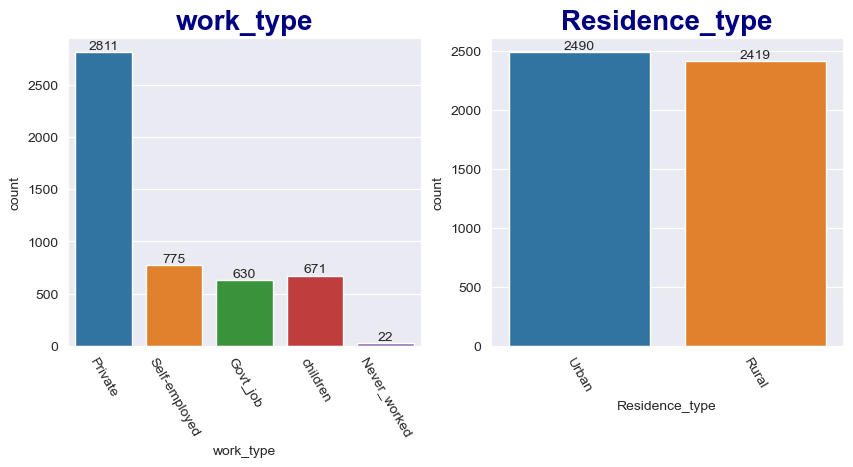

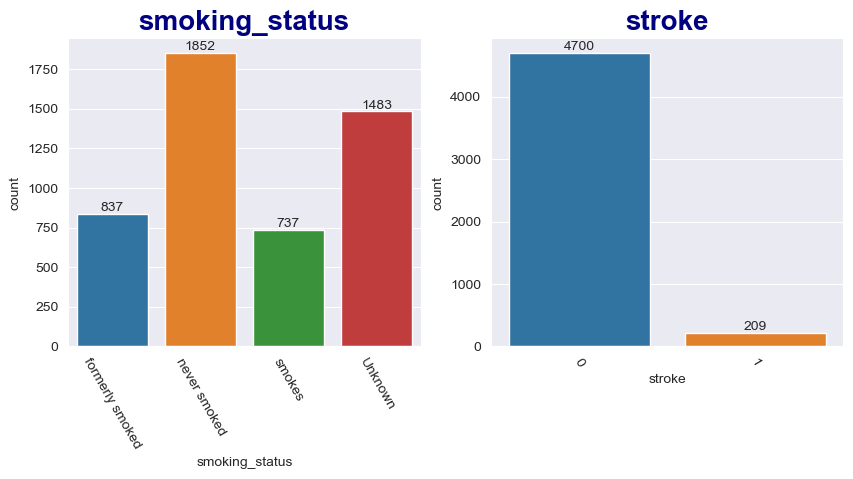

In [15]:
#This code generates pairs of count plots for each categorical column in the dataset. 

i=0
while i<8 :
    
    # Left AX
    fig = plt.figure(figsize=(10, 4)) #Creating a new figure for the pair of count plots with a specific size.
    plt.subplot(1, 2, 1) #Creating the left subplot
    plt.title(categorical_columns[i], size=20, weight='bold', color='navy') # Setting the title of the left subplot
    ax = sns.countplot(x=categorical_columns[i], data=data)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=300)
    i+=1
    
    # Right AX
    plt.subplot(1, 2, 2) #Creating the right subplot 
    plt.title(categorical_columns[i], size=20, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_columns[i], data=data)
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=300)
    i+=1
    plt.show()

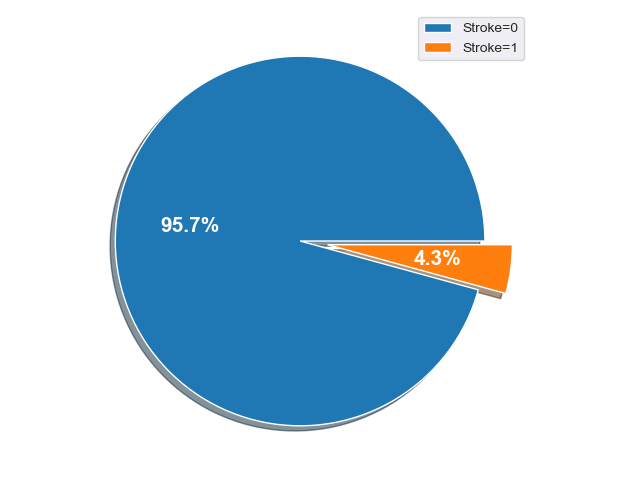

In [16]:
x = data['stroke'].value_counts() #counts the occurrences of each unique value in the 'stroke' column of the DataFrame 


explode = [0, 0.15] #second wedge, for STROKE=1 is exploded by 15% of the radius.
labels = ['Stroke=0', 'Stroke=1']
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

plt.pie(x, explode=explode, shadow=True, autopct='%1.1f%%', labels=labels, textprops=dict(color="w", weight='bold', size=15))
plt.legend()
plt.show()

### Unique Values
- We count number of unique values in each categorical column, to change them with integer values. Here we use .unique() command.

In [17]:
#creates a list, containing the names of categorical columns
columns_temp = ['gender', 'ever_married', 'work_type', 'smoking_status', 'Residence_type']

for col in columns_temp :
    print('column :', col)
    for index, unique in enumerate(data[col].unique()) :
        print(unique, ':', index) #prints each unique value in the column along with its index within the column.
    print('_'*45)

column : gender
Male : 0
Female : 1
Other : 2
_____________________________________________
column : ever_married
Yes : 0
No : 1
_____________________________________________
column : work_type
Private : 0
Self-employed : 1
Govt_job : 2
children : 3
Never_worked : 4
_____________________________________________
column : smoking_status
formerly smoked : 0
never smoked : 1
smokes : 2
Unknown : 3
_____________________________________________
column : Residence_type
Urban : 0
Rural : 1
_____________________________________________


In [18]:
#each block of code replaces categorical values in specific columns with corresponding numerical values

#for gender
data_2 = data.replace(
    {'gender' : {'Male' : 0, 'Female' : 1, 'Other' : 2}}
)

#for ever_married
data_2 =  data_2.replace(
    {'ever_married' : {'Yes' : 0, 'No' : 1}}
)

#for work_type
data_2 =  data_2.replace(
    {'work_type' : {'Private' : 0, 'Self-employed' : 1, 'Govt_job' : 2, 'children' : 3, 'Never_worked' : 4}}
)

#for smoking_status
data_2 =  data_2.replace(
    {'smoking_status' : {'formerly smoked' : 0, 'never smoked' : 1, 'smokes' : 2, 'Unknown' : 3}}
)

#for Residence_type
data_2 =  data_2.replace(
    {'Residence_type' : {'Urban' : 0, 'Rural' : 1}}
)

In [19]:
data_2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,0,0,228.69,36.6,0,1
2,0,80.0,0,1,0,0,1,105.92,32.5,1,1
3,1,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1,79.0,1,0,0,1,1,174.12,24.0,1,1
5,0,81.0,0,0,0,0,0,186.21,29.0,0,1


### Normalization

- Define X & y 

In [20]:
#The resulting DataFrame contains the features (independent variables) that will be
#used to train a model.

X_temp = data_2.drop(columns='stroke')
y = data_2.stroke #epresents the target variable (dependent variable)

- To decrease effect of larg values, we use MinMaxScaler to normalize X.

In [21]:
scaler = MinMaxScaler().fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)
X.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,0.295274,0.522282,0.091872,0.049501,0.347321,0.210634,0.492768,0.231674,0.212981,0.527942
std,0.246098,0.275331,0.288875,0.216934,0.476167,0.281014,0.499999,0.205080,0.089966,0.363382
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.304199,0.000000,0.000000,0.000000,0.000000,0.000000,0.101330,0.151203,0.333333
50%,0.500000,0.536133,0.000000,0.000000,0.000000,0.000000,0.000000,0.168775,0.203895,0.333333
75%,0.500000,0.731445,0.000000,0.000000,1.000000,0.500000,1.000000,0.269827,0.261168,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step-4:Modeling

- Initialization

In [22]:
# define a function to ploting Confusion matrix
def plot_confusion_matrix(y_test, y_prediction):
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Greens")
    ax.set_xlabel('Prediced labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke'])
    ax.yaxis.set_ticklabels(['Dont Had Stroke', 'Had Stroke']) 
    plt.show()

In [23]:
# Splite X, y to train & test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

### RandomForestClassifier

In [24]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_estimators' : [50, 100, 250, 500],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : ['sqrt', 'log2']
}

rf = RandomForestClassifier(n_jobs=-1)
rf_cv = GridSearchCV(estimator=rf, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', rf_cv.best_params_)

Tuned hyper parameters :  {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 500}


In [25]:
# calculate time befor training the Random Forest model.
t1 = datetime.now()
# Model: initializes rf with best hyperparameters found during grid search & fits in to training data
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)
# calculate time after after training the Random Forest model.
t2 = datetime.now()

In [26]:
#This line uses the trained Random Forest model to make predictions on the test data (X_test).
y_pred_rf = rf.predict(X_test)


#This line calculates and prints the accuracy score of the Random Forest model on the test data.

rf_train_score = round(rf.score(X_train, y_train), 3)
rf_test_score = round(rf.score(X_test, y_test), 3)

print('Training Score:', rf_train_score)
print('Testing Score:', rf_test_score)
print('Accuracy Score:', rf_test_score)
print('RandomForestClassifier score : ', rf_test_score)

Training Score: 1.0
Testing Score: 0.96
Accuracy Score: 0.96
RandomForestClassifier score :  0.96


In [27]:
#These lines calculate and print the time taken to train the Random Forest model.

delta = t2-t1
delta_rf = round(delta.total_seconds(), 3)
print('RandomForestClassifier takes : ', delta_rf, 'Seconds')

RandomForestClassifier takes :  0.892 Seconds


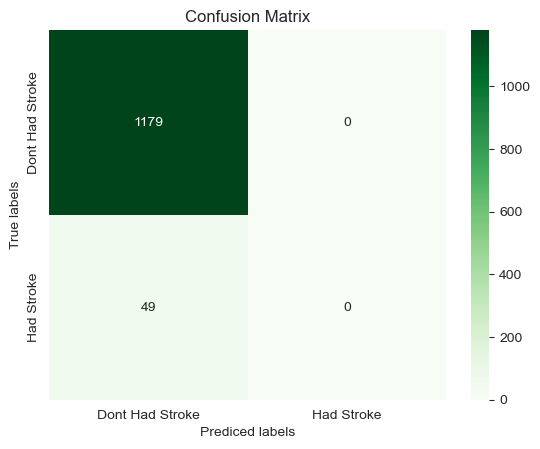

In [28]:
#This line calls the previously defined function 'plot_confusion_matrix' 
#to visualize the confusion matrix for the Random Forest model.

plot_confusion_matrix(y_test, y_pred_rf)

In [29]:
cr = metrics.classification_report(y_test, y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1179
           1       0.00      0.00      0.00        49

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.96      0.94      1228



### LogisticRegression

In [31]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000], #Inverse of regularization strength.
    'class_weight' : ['balanced'], #adjusting weights inversely proportional to class frequencies.
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'] #Algorithm to use in the optimization problem.
}

#This line initializes a Logistic Regression model (lr) with default hyperparameters.
lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10).fit(X_train, y_train)


#These lines print the best hyperparameters and the corresponding accuracy obtained during the grid search.
print('Tuned hyper parameters : ', lr_cv.best_params_)

Tuned hyper parameters :  {'C': 10, 'class_weight': 'balanced', 'solver': 'saga'}


In [32]:
# Calculate time befor training the Logistic Regression model.
t1 = datetime.now()
# Model
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)
# Calculate time after training the Logistic Regression model.
t2 = datetime.now()

In [35]:
#This line uses the trained Logistic Regression model to make predictions on the test data 
y_pred_lr = lr.predict(X_test)


#This line calculates and prints the accuracy score of the Logistic Regression model on the test data.
lr_train_score = round(lr.score(X_train, y_train), 3)
lr_test_score = round(lr.score(X_test, y_test), 3)

print('Training Score:', lr_train_score)
print('Testing Score:', lr_test_score)
print('Accuracy Score:', lr_test_score)
print('LogisticRegression score : ', lr_test_score)

Training Score: 0.847
Testing Score: 0.84
Accuracy Score: 0.84
LogisticRegression score :  0.84


In [36]:
#These lines calculate and print the time taken to train the Logistic Regression model.

delta = t2-t1
delta_lr = round(delta.total_seconds(), 3)
print('LogisticRegression takes : ', delta_lr, 'Seconds')

LogisticRegression takes :  0.028 Seconds


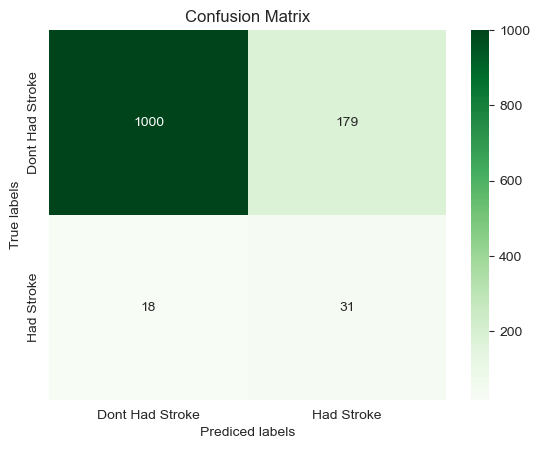

In [37]:
#This line calls the previously defined function plot_confusion_matrix 
#to visualize the confusion matrix for the Logistic Regression model.

plot_confusion_matrix(y_test, y_pred_lr)

In [38]:
#These lines calculate and print the classification report, which includes precision, recall, f1-score, and support for each class in the test set.


cr = metrics.classification_report(y_test, y_pred_lr)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1179
           1       0.15      0.63      0.24        49

    accuracy                           0.84      1228
   macro avg       0.56      0.74      0.57      1228
weighted avg       0.95      0.84      0.88      1228



### SVC

In [39]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
}



svc = SVC()
svc_cv = GridSearchCV(estimator=svc, param_grid=parameters, cv=10).fit(X_train, y_train)



print('Tuned hyper parameters : ', svc_cv.best_params_)

Tuned hyper parameters :  {'C': 0.001, 'gamma': 0.001}


In [40]:
# Calculate time befor run algorithm
t1 = datetime.now()
# Model
svc = SVC(**svc_cv.best_params_).fit(X_train, y_train)
# Calculate time after run algorithm
t2 = datetime.now()

In [42]:
y_pred_svc = svc.predict(X_test)

svc_train_score = round(svc.score(X_train, y_train), 3)
svc_test_score = round(svc.score(X_test, y_test), 3)

print('Training Score:', svc_train_score)
print('Testing Score:', svc_test_score)
print('Accuracy Score:', svc_test_score)
print('SVC Score : ', svc_test_score)

Training Score: 0.957
Testing Score: 0.96
Accuracy Score: 0.96
SVC Score :  0.96


In [43]:
delta = t2-t1
delta_svc = round(delta.total_seconds(), 3)
print('SVC : ', delta_svc, 'Seconds')

SVC :  0.017 Seconds


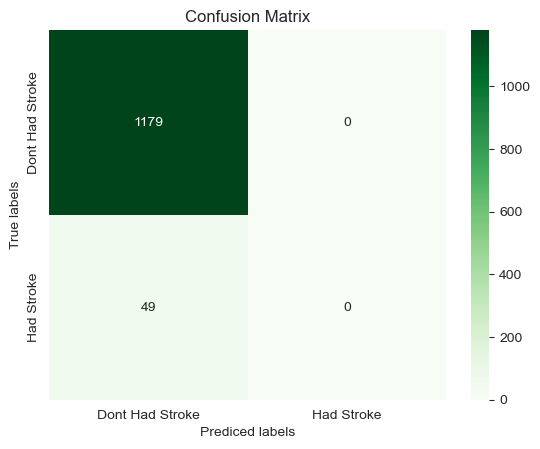

In [44]:
plot_confusion_matrix(y_test, y_pred_svc)

In [45]:
cr = metrics.classification_report(y_test, y_pred_svc)
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1179
           1       0.00      0.00      0.00        49

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.96      0.94      1228



### DecisionTreeClassifier

In [46]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : list(np.arange(4, 30, 1))
        }



tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, y_train)



print('Tuned hyper parameters : ', tree_cv.best_params_)

Tuned hyper parameters :  {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}


In [47]:
# Calculate time befor run algorithm :
t1 = datetime.now()
# Model :
tree = DecisionTreeClassifier(**tree_cv.best_params_).fit(X_train, y_train)
# Calculate time after run algorithm :
t2 = datetime.now()

In [49]:
y_pred_tree = tree.predict(X_test)

tree_train_score = round(tree.score(X_train, y_train), 3)
tree_test_score = round(tree.score(X_test, y_test), 3)

print('Training Score:', tree_train_score)
print('Testing Score:', tree_test_score)
print('Accuracy Score:', tree_test_score)
print('DecisionTreeClassifier Score : ', tree_test_score)

Training Score: 0.957
Testing Score: 0.957
Accuracy Score: 0.957
DecisionTreeClassifier Score :  0.957


In [50]:
delta = t2-t1
delta_tree = round(delta.total_seconds(), 3)
print('DecisionTreeClassifier takes : ', delta_tree, 'Seconds')

DecisionTreeClassifier takes :  0.004 Seconds


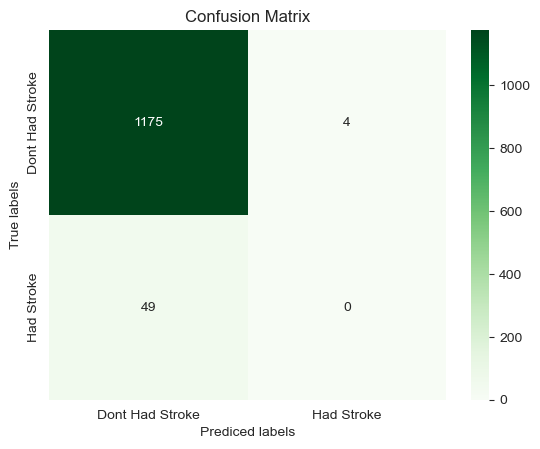

In [51]:
plot_confusion_matrix(y_test, y_pred_tree)

In [52]:
cr = metrics.classification_report(y_test, y_pred_tree)
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1179
           1       0.00      0.00      0.00        49

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.96      0.94      1228



### KNeighborsClassifier

In [53]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(3, 20, 2)),
    'p' : [1, 2, 3, 4]
}

# calculate time to run in second
t1 = datetime.now()

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

t2 = datetime.now()

print('Tuned hyper parameters : ', knn_cv.best_params_)
print('accuracy : ', knn_cv.best_score_)

Tuned hyper parameters :  {'n_neighbors': 11, 'p': 1}
accuracy :  0.9565335218569577


In [54]:
# Calculate time befor run algorithm :
t1 = datetime.now()
# Model :
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)
# Calculate time after run algorithm :
t2 = datetime.now()

In [55]:
y_pred_knn = knn_cv.predict(X_test)

knn_train_score = round(knn.score(X_train, y_train), 3)
knn_test_score = round(knn.score(X_test, y_test), 3)

print('Training Score:', knn_train_score)
print('Testing Score:', knn_test_score)
print('Accuracy Score:', knn_test_score)
print('KNeighborsClassifier Score :', knn_test_score)

Training Score: 0.957
Testing Score: 0.959
Accuracy Score: 0.959
KNeighborsClassifier Score : 0.959


In [56]:
delta = t2-t1
delta_knn = round(delta.total_seconds(), 3)
print('KNeighborsClassifier takes : ', delta_knn, 'Seconds')

KNeighborsClassifier takes :  0.002 Seconds


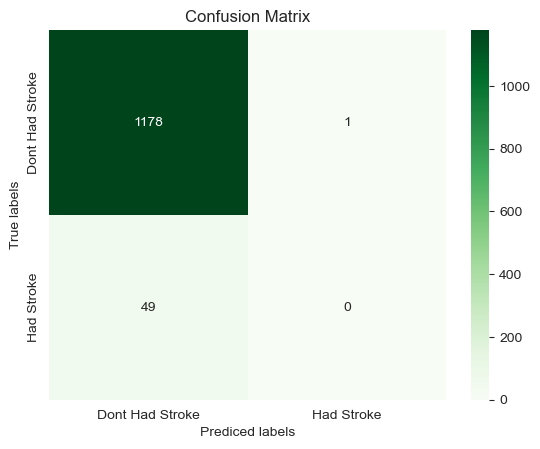

In [57]:
plot_confusion_matrix(y_test, y_pred_knn)

In [58]:
cr = metrics.classification_report(y_test, y_pred_knn)
print(cr)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1179
           1       0.00      0.00      0.00        49

    accuracy                           0.96      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.92      0.96      0.94      1228



## Result

In [60]:
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier', 'LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'KNeighborsClassifier'],
    'Score' : [rf_test_score, lr_test_score, svc_test_score, tree_test_score, knn_test_score], #accuracy scores for each algorithm
    'Delta_t' : [delta_rf, delta_lr, delta_svc, delta_tree, delta_knn] #contains the time taken (in seconds) for each algorithm.
})

result

,Algorithm,Score,Delta_t
0,RandomForestClassifier,0.960,0.892
1,LogisticRegression,0.840,0.028
2,SVC,0.960,0.017
3,DecisionTreeClassifier,0.957,0.004
4,KNeighborsClassifier,0.959,0.002


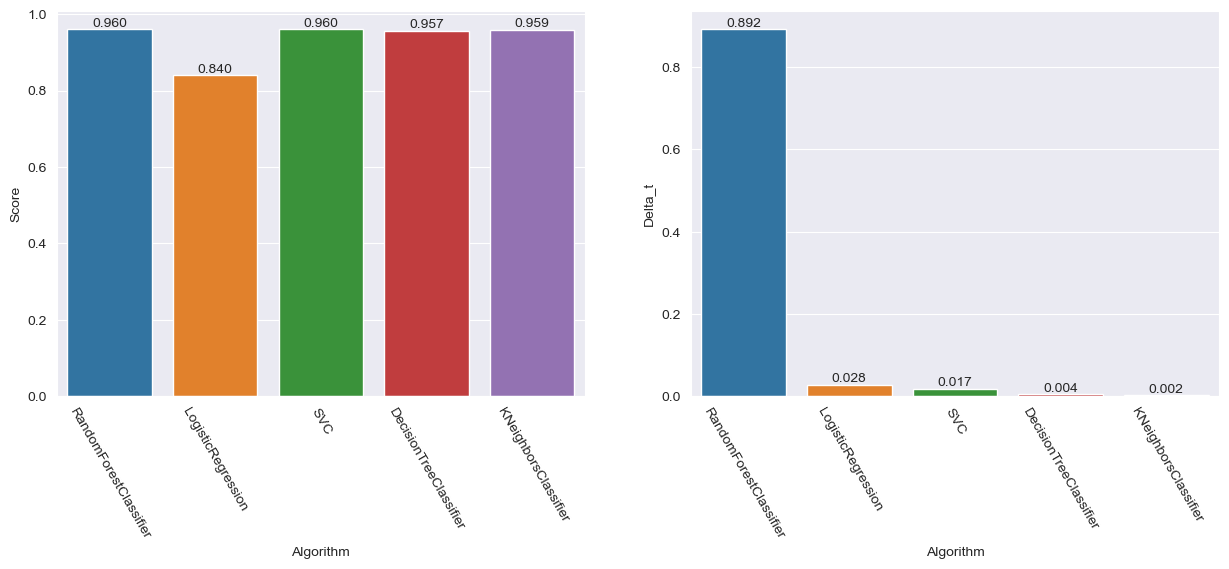

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x='Algorithm', y='Score', data=result, ax=ax[0])
ax[0].bar_label(ax[0].containers[0], fmt='%.3f')
ax[0].set_xticklabels(labels=result.Algorithm, rotation=300)

sns.barplot(x='Algorithm', y='Delta_t', data=result, ax=ax[1])
ax[1].bar_label(ax[1].containers[0], fmt='%.3f')
ax[1].set_xticklabels(labels=result.Algorithm, rotation=300)
plt.show()

### According to the above plots, best algorithms base on Score are :

1. RandomForestClassifier
2. SVC
3. DecisionTreeClassifier
4. KNeighborsClassifier

### And best Algorithm base on runtime, are :

- DecisionTreeClassifie
- KNeighborsClassifier


###  ~ We choose  KNeighborsClassifier 

### Final Modeling

In [62]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X, y)
knn

KNeighborsClassifier(n_neighbors=11, p=1)

In [63]:
# returns the accuracy score of the K-Nearest Neighbors classifier on the entire dataset
# The score method compares the predicted labels with the actual labels (y) and computes the accuracy.
knn.score(X, y)

0.9576288449786107